In [1]:
import numpy as np
from scipy.special import expit

def next_wi(X, wi, si):
    Omega = np.diag(np.multiply(si, 1 - si))
    XtOX = X.T.dot(Omega).dot(X)
    left_side = np.linalg.inv((XtOX))
    right_side = - X.T.dot(y - si)
    w_next = wi - left_side.dot(right_side)
    return w_next

X = np.array(
[[0.2, 3.1, 1],
[1.0, 3.0, 1],
[-0.2, 1.2, 1],
[1.0, 1.1, 1]]
)

y = np.array([1, 1, 0, 0])
w_0 = np.array([-1, 1, 0])


s_0 = expit(np.dot(X, w_0))
print(s_0)
w_1 = next_wi(X, w_0, s_0)
print(w_1)
s_1 = expit(np.dot(X, w_1))
print(s_1)
w_2 = next_wi(X, w_1, s_1)
print(w_2)

[0.94784644 0.88079708 0.80218389 0.52497919]
[ 1.32465198  3.04991697 -6.82910388]
[0.94737826 0.97455097 0.03124556 0.10437391]
[ 1.36602464  4.15753654 -9.19961627]


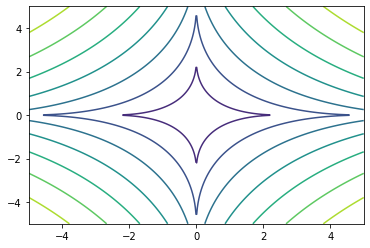

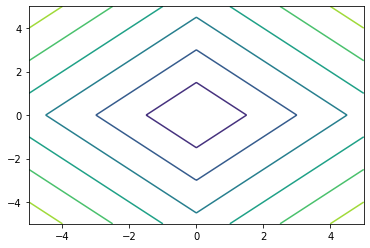

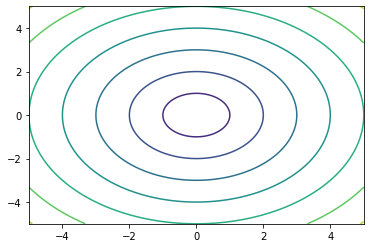

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def lp_norm(X, Y, p):
    return (np.abs(X)**p + np.abs(Y)**p)**(1/p)

x = np.linspace(-5, 5, 500)
y = np.linspace(-5, 5, 500)
X, Y = np.meshgrid(x, y)
# (a)
Z = lp_norm(X, Y, 0.5)
plt.contour(X, Y, Z)
plt.show()
# (b)
Z = lp_norm(X, Y, 1)
plt.contour(X, Y, Z)
plt.show()
# (c)
Z = lp_norm(X, Y, 2)
plt.contour(X,Y,Z)
plt.show()


In [3]:
import scipy
from scipy import io
import numpy as np
import matplotlib.pyplot as plt

training=scipy.io.loadmat('data.mat')
X=training['X']
y=training['y']

In [4]:
full_data = np.append(X, y, axis=1)

In [5]:
np.random.seed(42)
np.random.shuffle(full_data)
val_set=full_data[:1500]
train_set=full_data[1500:]

In [6]:
X_train = train_set[:, :12]
y_train = train_set[:, 12]
X_val = val_set[:, :12]
y_val = val_set[:, 12]

In [7]:
X_train = (X_train - np.mean(X_train, axis = 0)) / np.std(X_train, axis=0)
X_val = (X_val - np.mean(X_val, axis = 0)) / np.std(X_val, axis=0)

## Batch Gradient Descent

In [8]:

num_feature = X_train.shape[1]
w=np.zeros((num_feature,))
s=np.array(expit(np.dot(X_train,w)))

In [9]:
#parameters
num_iter = 5000
learn_rate = 0.0001
lam = 0.01

In [10]:
cost=np.zeros((num_iter+1,))
cost[0]= - np.dot(y_train, np.log(s)) - np.dot((1-y_train), np.log(1-s)) + 1/2*lam * np.sum(np.square(w))
for iter in np.arange(num_iter):
    grad = lam*w - np.dot(X_train.T, y_train-s)
    w = w - learn_rate * grad
    s=np.array(expit(np.dot(X_train, w)))
    cost[iter+1] = - np.dot(y_train, np.log(s)) - np.dot((1-y_train), np.log(1-s)) + 1/2*lam * np.sum(np.square(w))




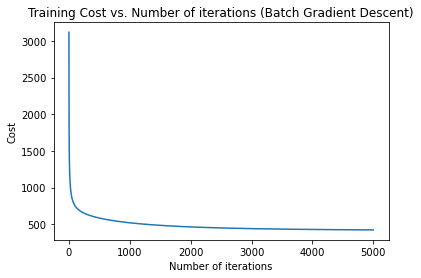

In [11]:
plt.plot(np.arange(num_iter+1),cost)
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('Training Cost vs. Number of iterations (Batch Gradient Descent)')
plt.show()

## Stochastic

In [12]:
num_iter = 10000
learn_rate = 0.00001
lam = 0.1


num_data = X_train.shape[0]
num_feature = X_train.shape[1]
w=np.zeros((num_feature,))
s=np.array(expit(np.dot(X_train,w)))
cost=np.zeros((num_iter+1,))
cost[0]= - np.dot(y_train, np.log(s)) - np.dot((1-y_train), np.log(1-s)) + 1/2*lam * np.sum(np.square(w))
for iter in np.arange(num_iter):
    index = np.random.randint(num_data)
    grad = lam*w - num_data * np.dot(X_train[index], y_train[index]-s[index])
    w = w - learn_rate * grad
    s=np.array(expit(np.dot(X_train, w)))
    cost[iter+1] = - np.dot(y_train, np.log(s)) - np.dot((1-y_train), np.log(1-s)) + 1/2*lam * np.sum(np.square(w))

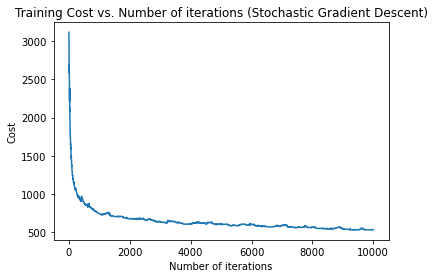

In [13]:
plt.plot(np.arange(num_iter+1),cost)
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('Training Cost vs. Number of iterations (Stochastic Gradient Descent)')
plt.show()

## Step size

In [14]:
num_iter = 10000
learn_rate_0 = 1e-4
lam = 0.1


num_data = X_train.shape[0]
num_feature = X_train.shape[1]
w=np.zeros((num_feature,))
s=np.array(expit(np.dot(X_train,w)))
cost_shrinklr=np.zeros((num_iter+1,))
cost_shrinklr[0]= - np.dot(y_train, np.log(s)) - np.dot((1-y_train), np.log(1-s)) + 1/2*lam * np.sum(np.square(w))
for iter in np.arange(num_iter):
    learn_rate = learn_rate_0/(iter+1)
    index = np.random.randint(num_data)
    grad = lam*w - num_data * np.dot(X_train[index], y_train[index]-s[index])
    w = w - learn_rate * grad
    s=np.array(expit(np.dot(X_train, w)))
    cost_shrinklr[iter+1] = - np.dot(y_train, np.log(s)) - np.dot((1-y_train), np.log(1-s)) + 1/2*lam * np.sum(np.square(w))

    

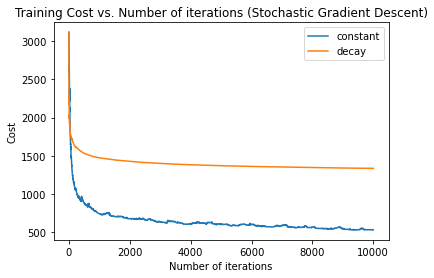

In [15]:
plt.plot(np.arange(num_iter+1),cost,label = 'constant')
plt.plot(np.arange(num_iter+1),cost_shrinklr, label = 'decay')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('Training Cost vs. Number of iterations (Stochastic Gradient Descent)')
plt.legend()
plt.show()

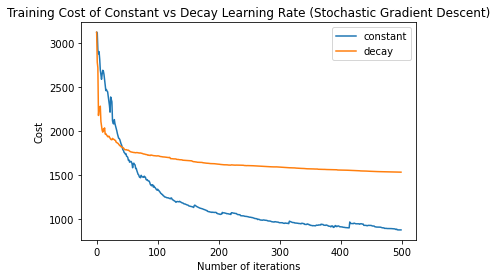

In [16]:
plt.plot(np.arange(500),cost[:500], label = 'constant')
plt.plot(np.arange(500),cost_shrinklr[:500], label = 'decay')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('Training Cost of Constant vs Decay Learning Rate (Stochastic Gradient Descent)')
plt.legend()
plt.show()

## Kaggle

In [17]:
def accuracy(y_pred, y):
    return (y == y_pred).sum() / y.shape[0]

In [18]:
def predict(X, w):
    return np.array(expit(np.dot(X, w))>0.5).astype('float')

In [19]:
#parameters
num_iter = 8000
learn_rate = 0.000001
lam = 0.1

def fit(X, learn_rate, lam):
    num_feature = X_train.shape[1]
    w=np.zeros((num_feature,))
    s=np.array(expit(np.dot(X_train,w)))
    cost=np.zeros((num_iter+1,))
    cost[0]= - np.dot(y_train, np.log(s)) - np.dot((1-y_train), np.log(1-s)) + 1/2*lam * np.sum(np.square(w))
    for iter in np.arange(num_iter):
        grad = lam*w - np.dot(X_train.T, y_train-s)
        w = w - learn_rate * grad
        s=np.array(expit(np.dot(X_train, w)))
        cost[iter+1] = - np.dot(y_train, np.log(s)) - np.dot((1-y_train), np.log(1-s)) + 1/2*lam * np.sum(np.square(w))
    return w




In [20]:
# learn_rate_lst = [10**(-i) for i in range(3,10)]
# lam_lst = [10**(-i) for i in range(-2,4)]
# num_iter = 7000

# result = []

# for lr in learn_rate_lst:
#     for lam in lam_lst:
#         val_pred = predict(X_val, fit(X, lr, lam))
#         result.append([lr, lam, accuracy(val_pred, y_val)])

In [21]:
# max = 0
# for i in range(len(result)):
#     if result[i][2] > max:
#         max = result[i][2]
#         max_comb = result[i]

In [22]:
from scripts.save_csv import results_to_csv

In [23]:
X_test = training['X_test']
X_test = (X_test - np.mean(X_test, axis = 0)) / np.std(X_test, axis=0)
my_pred = predict(X_test, w)

In [24]:
results_to_csv(my_pred)